In [ ]:
#hiddencell
%pip install seaborn

import pandas as pd 
from pbl_tools import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')


# 스테이지 5

# 1. pandas를 이용해 csv 파일 읽어오기
[문제 1]    
Pandas 라이브러리(library)를 가져와보세요.   
그리고 train.csv, test.csv, sample_submission.csv 파일을 각각 train, test, submission 변수로 읽어오세요.     
아래 빈칸을 채워주세요.

In [45]:
import ___ as ___

train = pd.___('train.csv')
test = pd.___('test.csv')
submission = pd.___('sample_submission.csv')

In [46]:
#checkcode
ensure_vals(globals(), 'train', 'test', 'submission')
@check_safety
def check(
    user_answer_train = train, 
    user_answer_test = test, 
    user_answer_submission = submission
):
    c_point1 = hasattr(user_answer_train, 'head')
    c_point2 = hasattr(user_answer_test, 'head')
    c_point3 = hasattr(user_answer_submission, 'head')
    
    if (c_point1 and 
        c_point2 and 
        c_point3
    ):
        return True
    else:
        return False
    
check()

True

### Inst.  

### Hint.
`pd.read_csv('파일경로/파일명')` 를 활용해 보세요.

### Solution.
```python
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
```

# 2. 데이터프레임 정보 확인하기

이번 스테이지에서는 **지난 학습에서 탐색적 자료 분석(EDA)을 통해 얻은 인사이트를 바탕으로** 전처리한 변수,     
`연`, `월`, `일` 이 담겨 있는 데이터 셋을 불러왔습니다.

In [ ]:
train.info()

In [ ]:
#checkcode
#empty

### Inst.

---

#### 결과 해석

`info()` 함수를 이용해 데이터 결측치 및 변수들의 타입을 확인해 본 결과,  
train 데이터는 총 13개의 열과 273개의 행으로 이루어져 있습니다.

우선 13개의 열을 하나씩 살펴보겠습니다.

1. date_time: 일별 날짜를 의미합니다.
2. wind_direction: 풍향(degree)을 의미합니다.
3. sky_condition: 하늘 상태를 의미합니다.
4. precipitation_form: 강수 형태를 의미합니다.
5. wind_speed: 풍속(m/s)을 의미합니다.
6. humidity: 습도(%)를 의미합니다.
7. low_temp: 최저 기온(`C)을 의미합니다.
8. high_temp: 최고 기온(`C)을 의미합니다.
9. Precipitation_Probability: 강수 확률(%)을 의미합니다.
10. number_of_rentals: 따릉이 대여량을 의미하며, 우리가 구하고자 하는 값입니다.
11. year: 연도를 의미합니다.
12. month: 월을 의미합니다.
13. day: 일을 의미합니다.

지난 스테이지의 10개 변수에 파생변수 `연`, `월`, `일` 이 포함되어 총 13개로 늘어난 것을 알 수 있습니다.  

그리고 Non-Null Count를 살펴보면 모든 변수에서 결측치(누락된 데이터)는 존재하지 않는 것을 알 수 있습니다.    
만약 결측치가 존재한다면, 보다 정확한 모델을 설계하기 위해 적절하게 처리해 주어야 합니다.   

또한 이 변수들은 다음과 같은 3개의 카테고리로 나눠서 생각할 수 있습니다.

>- 날짜: 연, 월, 일
>- 기상 정보: 풍향, 하늘 상태, 강수 형태, 풍속, 습도, 최저 기온, 최고 기온, 강수 확률
>- 예측하고자 하는 대상: 따릉이 대여량

### Hint.
empty

### Solution.
empty

# 3. 요일 정보 추가
[문제 2]   
이번 스테이지에서는 연, 월, 일 뿐만 아니라 요일 변수까지 추가해 보도록 하겠습니다.

pandas의 `to_datetime()` 메소드를 이용하여 요일을 나타내는 열(column)을 만들어 봅시다.

In [ ]:
week_day = pd.___(train['date_time']).dt.day_name()   
train['week_day'] = week_day

In [43]:
#checkcode
ensure_vals(globals(), 'train')
@check_safety
def check(user_answer_train = train):
    check_week_day = pd.to_datetime(user_answer_train['date_time']).dt.day_name()
    
    c_point1 = (user_answer_train['week_day'] == check_week_day).all()
    
    if c_point1:
        return True
    else:
        return False
    
check()

False

### Inst.

`pd.to_datetime()` 함수에 변환하고자 하는 날짜 데이터를 전달하여 날짜 형식으로 변환합니다.   
그 후, `.dt.day_name()` 속성을 사용하여 날짜의 요일을 추출합니다.     
추출한 요일 정보를 새로운 열로 추가하기 위해 해당 열 이름을 지정하고 할당합니다.  

이를 통해 각 날짜의 요일을 문자열 형태로 얻을 수 있습니다.     
이 코드에서는 변환된 요일 정보를 week_day라는 새로운 열로 추가하였습니다.

<img src="https://drive.google.com/uc?id=1WTlJvCXUrQ6kqLRUQtOJJaNv4YmyHu8M">

### Hint.
empty

### Solution.
```python
week_day = pd.to_datetime(train['date_time']).dt.day_name()   
train['week_day'] = week_day
```

# 4. 요일별 따릉이 대여량 비교

bar(막대 그래프)를 이용해 요일별 따릉이 대여량을 살펴보겠습니다.

seaborn의 막대 그래프는 `barplot` 함수를 이용해 그릴 수 있습니다.

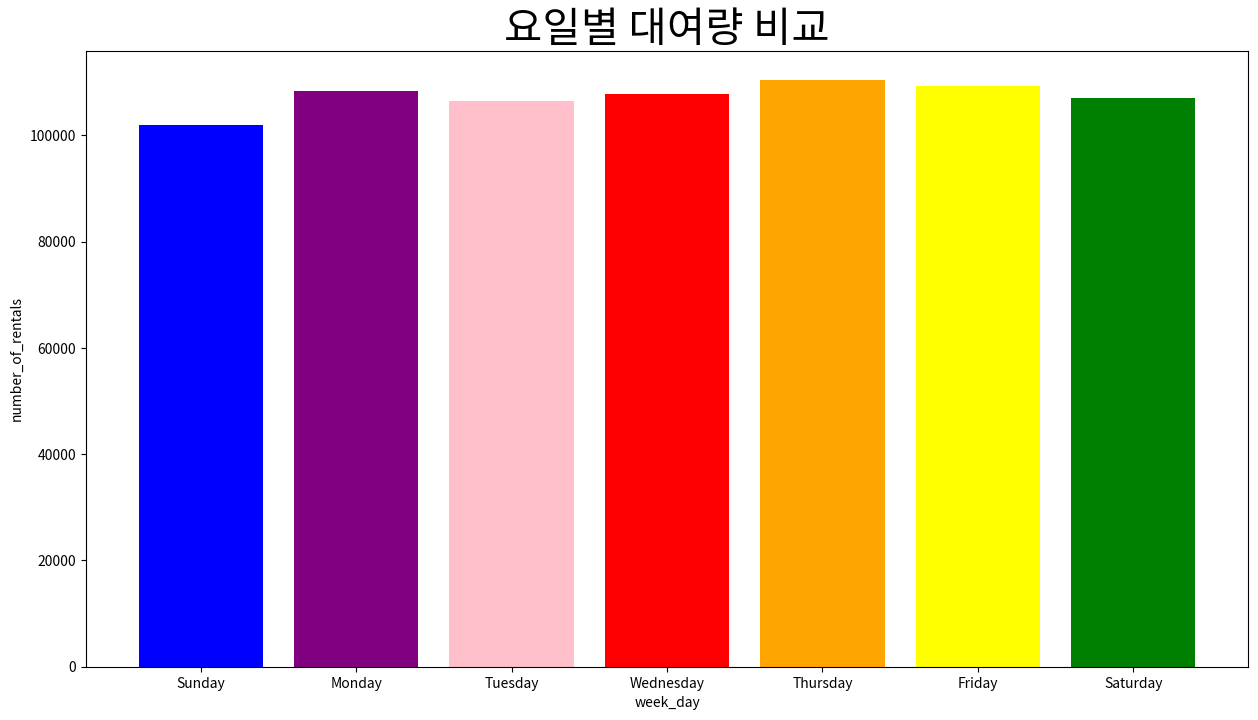

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'])
plt.title('요일별 대여량 비교', fontsize=40)
plt.show()

In [ ]:
#checkcode
#empty

### Inst.
해당 코드는 요일별로 따릉이 대여량을 비교하기 위한 시각화하는 코드입니다. 막대 그래프를 통해 각 요일의 대여량을 파악할 수 있습니다.

1. `import matplotlib.pyplot as plt`: matplotlib의 pyplot 모듈을 임포트합니다. 이를 통해 그래프를 그리고 시각화할 수 있습니다.
2. `import seaborn as sns` : seaborn 라이브러리를 임포트합니다. seaborn은 matplotlib을 기반으로 한 데이터 시각화 라이브러리로, 보다 간편하고 깔끔한 시각화를 제공합니다.
3. `plt.figure(figsize=(15,8))` : 그래프의 크기를 지정합니다. figsize 매개변수를 통해 가로와 세로 크기를 인치 단위로 설정합니다.
4. `sns.barplot(x=train['week_day'], y=train['number_of_rentals'])` : seaborn의 barplot 함수를 사용하여 요일별 대여량을 막대 그래프로 나타냅니다.   
x축에는 요일 정보(train['week_day']), y축에는 대여량 정보(train['number_of_rentals'])를 지정합니다.
5. `plt.title('요일별 대여량 비교', fontsize=40)` : 그래프의 제목을 설정합니다. 제목은 "요일별 대여량 비교"로 지정되며, 폰트 크기는 40으로 설정됩니다.
6. `plt.show()` : 그래프를 화면에 표시합니다.

---

#### 결과 해석

요일별로 따릉이 사용량은 큰 차이가 없는 것으로 보이네요.    
연도별 차이량을 무시하고 통째로 봤기 때문일까요?   



### Hint.
empty

### Solution.
empty

# 5. 요일별 + 연도별 따릉이 대여량 비교

이번엔 요일별, 연도별 대여량을 시각화해 비교해 보겠습니다.

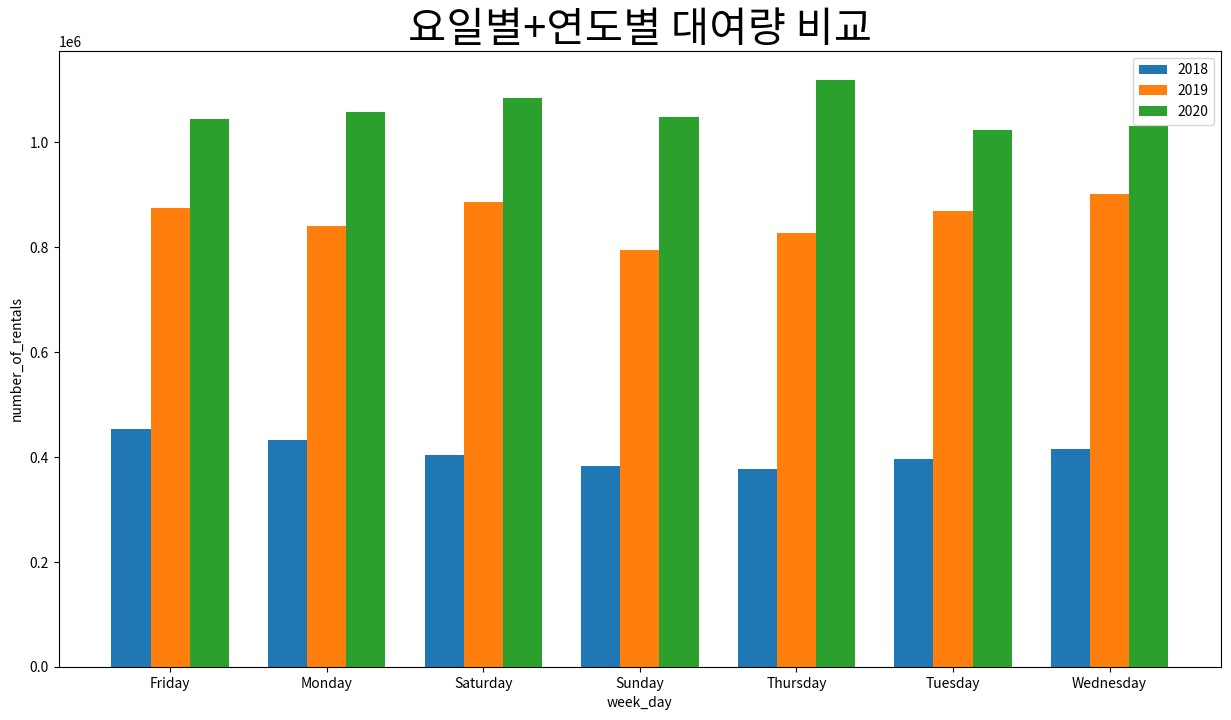

In [13]:
train['year'] = train['date_time'].apply(lambda x :int( x.split('-')[0]))

plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'], hue=train['year'])
plt.title('요일별+연도별 대여량 비교', fontsize=40)
plt.show()

In [ ]:
#checkcode
#empty

### Inst.

해당 코드는 seaborn의 barplot 함수를 사용하여 요일별로 연도별 대여량을 비교하는 막대 그래프를 시각화하는 코드입니다.  
각 막대의 높이는 대여량을 나타내며, 막대의 색상은 연도를 구분합니다.

x축에는 요일(week_day)을, y축에는 대여량(number_of_rentals)을 설정합니다.   
hue 매개변수를 이용하여 연도(year)별로 그래프의 색상을 구분합니다.

<img src="https://drive.google.com/uc?id=1Em8eefWbP2iT8_nm2jFjpFn2y309hQK7">


---

#### 결과 해석
출력된 결과를 보고 어떤 특징을 발견했나요?

주중, 주말에 따른 따릉이 대여량은 큰 변화가 없었으며, 연도별로 구분했을 때도 큰 차이를 관찰하지 못했습니다.

### Hint.
empty

### Solution.
empty

# 6. 더위 점수(hot_score)

그렇다면, 날씨가 덥고 습한 날에 사람들은 외출을 많이 할까요?     
이런 날씨가 따릉이 대여량에 영향을 미칠까요?

이를 알아보기 위하여 '더위 점수'라는 파생변수를 한번 만들어 봅시다.

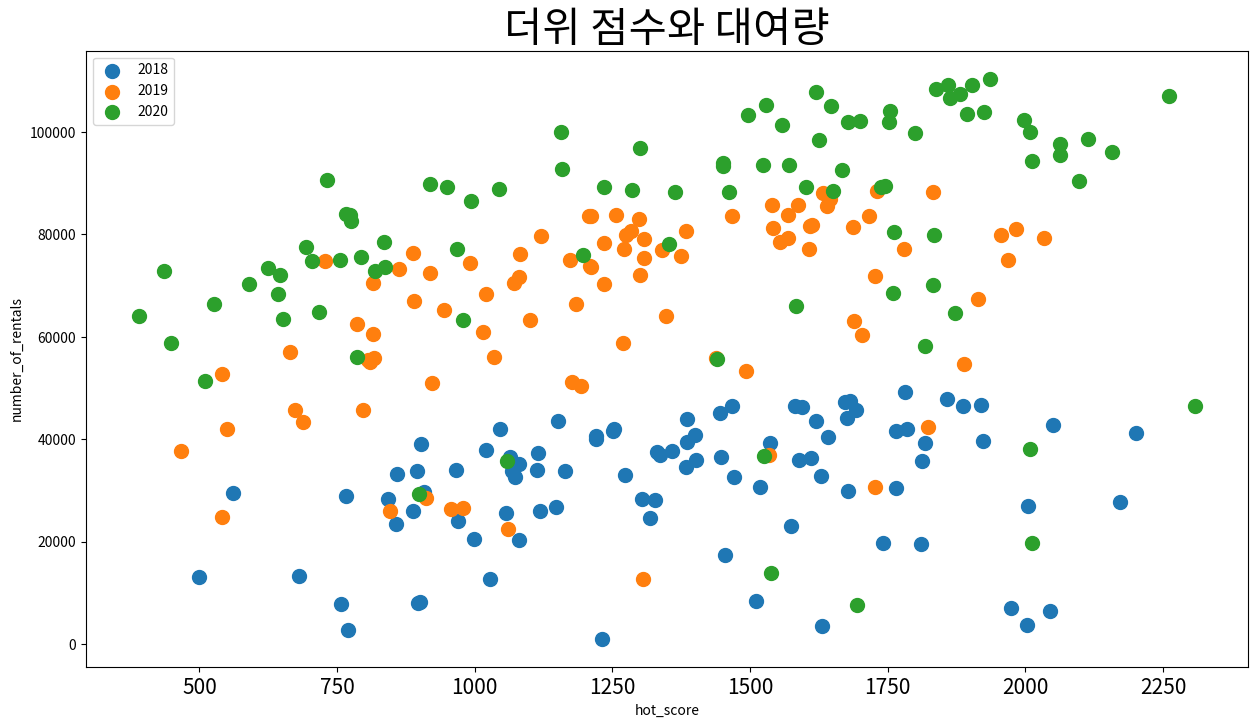

In [14]:
hot_score = train['high_temp'] * train['humidity']

plt.figure(figsize=(15,8))
sns.scatterplot(x=hot_score, y=train['number_of_rentals'], hue=train['year'], s=150)
plt.xticks(fontsize=15)
plt.title('더위 점수와 대여량', fontsize=30)
plt.show()

In [ ]:
#checkcode
#empty

### Inst.
해당 코드는 '더위 점수'와 대여량 간의 관계를 산점도로 시각화하는 코드입니다.  
먼저, '더위 점수'를 계산하기 위해 최고 기온(high_temp)과 습도(humidity)를 곱하여 hot_score 변수에 저장합니다.  
(더위 점수는 최고 기온이 높고, 습도가 높을수록 높은 점수를 갖으므로, 변수를 생성할 때는 곱하기를 이용합니다.)  

그 후, `sns.scatterplot()` 함수를 사용하여 x축에는 '더위 점수'를, y축에는 대여량(number_of_rentals)을 나타내는 산점도를 그립니다.     
산점도의 점의 색상은 연도(year)에 따라 구분되며, 점의 크기는 s 파라미터를 통해 설정됩니다.   

마지막으로, x축과 y축의 레이블을 설정하고, 그래프의 제목을 지정하여 전체적인 시각화 결과를 나타냅니다.  

---

### 결과 해석
더위 점수(날씨가 덥고 습하다)가 따릉이 대여량에 영향을 주는 것으로 판단되며,   
따릉이 대여량과 더위점수(=날씨가 덥고 습하다)는 양의 상관관계임을 알 수 있습니다.

### Hint.
empty

### Solution.
empty

# 7. 추위 점수(cold_score)


그럼 반대로, 날씨가 춥고 풍속이 강한 날은 어떨까요?   
이런 날씨가 따릉이 대여량에 영향을 미칠까요?

이를 알아보기 위하여 추위 점수라는 파생변수를 한번 만들어 봅시다.

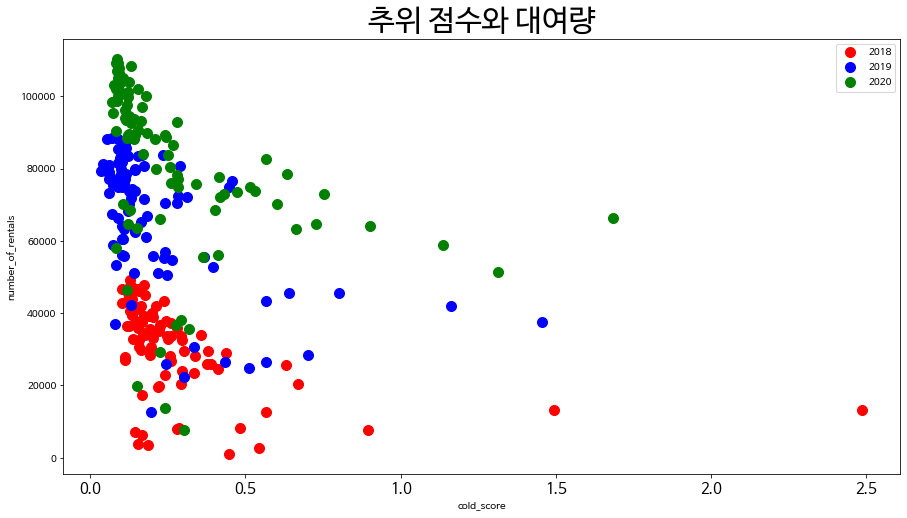

In [ ]:
cold_score = train['wind_speed'] / train['low_temp']

plt.figure(figsize=(15,8))
sns.scatterplot(x = cold_score, y=train['number_of_rentals'], hue=train['year'], s = 150 )
plt.xticks(fontsize=15)
plt.title('추위 점수와 대여량', fontsize = 30)
plt.show()

In [16]:
#checkcode
#empty

True

### Inst.

해당 코드는 "추위 점수"를 계산하고, 이를 이용하여 따릉이 대여량과의 상관관계를 시각화합니다.

먼저, cold_score 변수는 wind_speed 풍속을 low_temp 최저 기온으로 나눈 값으로 추위 점수를 계산합니다.   
(추위 점수는 최저 기온이 낮을수록 높은 점수를 얻어야 하므로, 변수를 생성할 때는 나누기를 이용합니다.)  
이후, sns.scatterplot 함수를 사용하여 cold_score를 x축으로, train['number_of_rentals']을 y축으로 설정하여 산점도를 그립니다.   
hue=train['year']를 통해 연도별로 색상을 구분하며, s=150는 점의 크기를 설정하는 매개변수입니다.

마지막으로, plt.xticks(fontsize=15)를 통해 x축 눈금의 폰트 크기를 설정하고,   
plt.title 함수를 사용하여 그래프의 제목을 설정합니다.   
그래프를 보여주기 위해 plt.show()를 호출합니다.   
이를 통해 추위 점수와 따릉이 대여량의 상관관계를 시각적으로 확인할 수 있습니다.

---

#### 결과 해석

- 추위 점수와 따릉이 대여량 사이엔 음의 상관 관계가 있다.
- 추위 점수(=날씨가 춥고 풍속이 강하다)가 따릉이 대여량에 영향을 주는 것으로 판단되므로 추위 점수 변수를 생성해 보자!

### Hint.
empty

### Solution.
empty

# 8. 연도별 대여량

지난 스테이지에서는 단순하게 연도별 따릉이 대여량의 평균을 시각화해 보았는데요, 

이번에는 scatter plot(산점도)를 이용하여 조금 더 구체적으로 시각화해 보도록 하겠습니다!


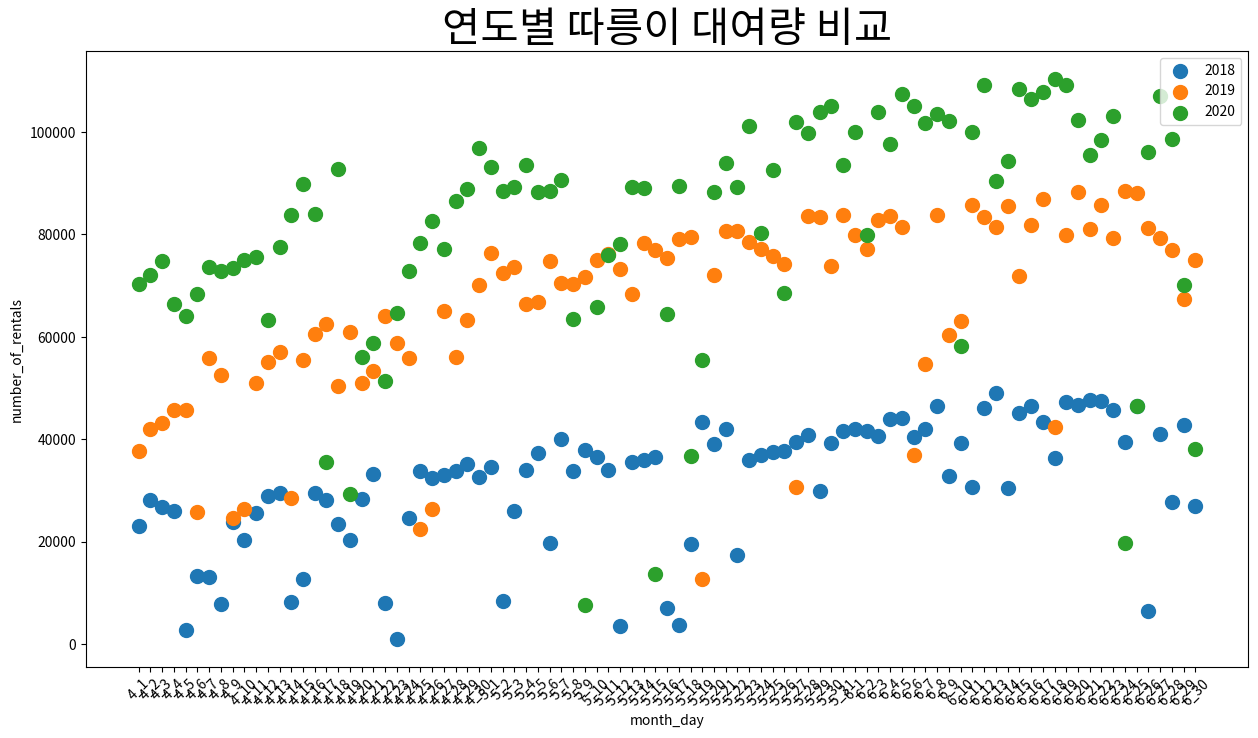

In [17]:
month_day = train['month'].astype(str) + '_' + train['day'].astype(str)

plt.figure(figsize=(15,8))

sns.scatterplot(x=month_day, y=train['number_of_rentals'], hue=train['year'], s=150)
plt.xticks(rotation=45)
plt.title('연도별 따릉이 대여량 비교', fontsize=40)
plt.show()

In [ ]:
#checkcode
#empty

### Inst.

해당 코드는 월과 일을 조합하여 month_day라는 새로운 변수를 생성하고, 이를 이용하여 연도별 따릉이 대여량의 비교를 시각화합니다.

먼저, month와 day를 문자열로 변환하여 결합한 month_day 변수를 생성합니다.   
train['month'].astype(str)은 month 컬럼의 값을 문자열로 변환하여 반환합니다.   
이후 + 연산자를 사용하여 문자열 결합을 수행하고, 결합된 값을 train['day'].astype(str)을 통해 day 컬럼의 값도 문자열로 변환하여 결합합니다.   
결과적으로 month_day 변수는 month와 day 값을 _ 기호로 구분한 문자열로 이루어진 Series(열)가 됩니다.

이후, sns.scatterplot 함수를 사용하여 month_day를 x축으로, train['number_of_rentals']을 y축으로 설정하여 산점도를 그립니다.   
hue=train['year']를 통해 연도별로 색상을 구분하며, s=150는 점의 크기를 설정하는 매개변수입니다.

그리고 plt.xticks(rotation=45)를 통해 x축 눈금의 레이블을 45도로 회전시킵니다.   
이를 통해 월과 일의 레이블이 겹치지 않도록 조정할 수 있습니다.   

마지막으로, plt.title 함수를 사용하여 그래프의 제목을 설정하고, plt.show()를 호출하여 그래프를 출력합니다.   
이를 통해 연도별 따릉이 대여량의 비교를 시각적으로 확인할 수 있습니다.

---

#### 결과 해석
연도별로 따릉이 대여량이 꾸준히 증가하는 것을 확인할 수 있습니다.
 
따릉이는 서비스를 이용할 수 없는, "휴무일"이 없는 무인 공공 대여 서비스이기 때문에   
중간중간에 있는 아주 낮은 점들은 비가 많이 오는 등 날씨가 궂은 날이었다고 판단할 수 있겠습니다.

### Hint.
empty

### Solution.
empty

# 9. feature와 target의 상관관계

이제 마지막 EDA로 feature와 target의 상관관계를 알아봅시다.  
corr 메소드는 각 열 간의 상관 계수를 반환하는 메소드입니다.  
기본 상관 계수 값으로 피어슨 상관 계수를 이용합니다.  
seaborn의 `heatmap()` 메소드를 이용하여 시각화를 해봅시다.

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
#checkcode
#empty

### Inst.
해당 코드는 데이터의 변수들 간의 상관 관계를 시각화하여 파악할 수 있게 도와줍니다.   
히트맵은 색상을 사용하여 상관 관계의 강도를 나타내며, 주어진 데이터셋의 변수들 간의 상관 관계를 파악하는 데 유용합니다.   
상관 관계는 -1부터 1까지의 값으로 나타나며, 양수 값은 양의 상관 관계를, 음수 값은 음의 상관 관계를 나타냅니다.   
높은 절댓값은 강한 상관 관계를 나타내며, 0에 가까운 값은 상관 관계가 약하거나 없음을 의미합니다.   
히트맵을 통해 변수들 간의 상관 관계를 시각적으로 파악하여 데이터 분석 및 모델링에 활용할 수 있습니다.

- sns.heatmap(): Seaborn 라이브러리의 히트맵 함수를 호출합니다.
    - data=train.corr(method='pearson'): 상관 행렬을 계산하여 데이터를 전달합니다. 
    - method='pearson'은 피어슨 상관 계수를 사용하여 상관 행렬을 계산한다는 의미입니다.
    - annot=True: 히트맵 안에 각 셀에 값을 표시합니다.
    -  fmt='.2f': 표시되는 값들의 포맷을 소수점 2자리까지로 설정합니다.
    - linewidths=.5: 각 셀의 경계선의 너비를 설정합니다.
    - cmap='Blues': 히트맵의 색상 맵을 설정합니다.

--- 

#### 결과 해석

따릉이 대여량과 다른 변수들을 비교해본 결과, 온도와 따릉이 대여량은 양의 상관관계를 가지고 있습니다.  
반면에 강수량과 미세먼지는 따릉이 대여량과 음의 상관관계를 가지고 있습니다.  
이를 종합해보면, 따릉이 대여량은 온도가 높을수록 증가하며, 강수량과 미세먼지가 낮을수록 증가하는 경향을 보입니다.  

### Hint.
empty

### Solution.
empty

# 10. 더위 점수 파생변수 생성
[문제 3]  
따릉이 대여량(Target)과 상관 관계가 있는 파생변수인 더위 점수를 새로운 변수로 생성해 주도록 합시다.    
더위 점수(hot_score)를 계산하기 위해 최고 기온(high_temp)과 습도(humidity)를 곱하여 hot_score 변수에 할당해 주세요.  
아래 빈칸을 채워주세요.

In [19]:
train['___']  = train['___'] * train['___']
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,number_of_rentals,week_day,hot_score
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,22994,Sunday,1575.000000
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,28139,Monday,1326.827000
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,26817,Tuesday,1146.846764
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,26034,Wednesday,888.628432
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,2833,Thursday,768.903064


In [ ]:
#checkcode
ensure_vals(globals(),'train')
@check_safety
def check():
    train_check = pd.read_csv('train.csv')
    train_check['hot_score'] = train['high_temp'] * train['humidity']

    if (train['hot_score'] == train_check['hot_score']).all():
        return True
    else:
        return False
    
check()

### Inst.


### Hint.
1. 곱하기(*) 연산자를 이용해 보세요.
2. 데이터셋['칼럼명']의 형태로 특정 변수를 불러올 수 있습니다.

### Solution.
```python
train['hot_score']  = train['high_temp'] * train['humidity']
train.head()
```

# 11. 추위 점수 파생변수 생성

[문제 4]  

'cold_score' 변수는 train 데이터셋의 'wind_speed'와 'low_temp' 컬럼을 활용하여 계산됩니다.   
이 변수는 풍속을 최저 기온으로 나눈 값으로, 추위 점수를 나타냅니다.  
아래 빈칸을 채워주세요.

In [20]:
train['___'] = train['___'] ___ train['___']
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,number_of_rentals,week_day,hot_score,cold_score
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,22994,Sunday,1575.000000,0.242063
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,28139,Monday,1326.827000,0.255854
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,26817,Tuesday,1146.846764,0.260861
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,26034,Wednesday,888.628432,0.377526
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,2833,Thursday,768.903064,0.542298


In [ ]:
#checkcode
ensure_vals(globals(),'train')
@check_safety
def check():
    train_check = pd.read_csv('train.csv')
    train_check['cold_score'] = train_check['wind_speed'] / train_check['low_temp']

    if (train['cold_score'] == train_check['cold_score']).all():
        return True
    else:
        return False
    
check()

### Inst.

### Hint.
1. 나누기(/) 연산자를 이용해 보세요.
2. 데이터셋['칼럼명']의 형태로 특정 변수를 불러올 수 있습니다.

### Solution.
```python
train['cold_score'] = train['wind_speed'] / train['low_temp']
train.head()
```

# 12. 연도 별 인플레이션 반영(2020년도 기준)

이번엔 2018, 2019, 2020년도 데이터 값만 활용하는 게 아니라,   
연도별 따릉이 대여량 증가율 즉, `Year 인플레이션`을 반영해 주는 변수를 생성해 보는 것은 어떨까요?    

그 이유는, 앞서 EDA를 한 결과에서 따릉이 대여량이 매년 증가했기 때문입니다.  
그렇다면 단순히 있는 데이터를 변수로 설정하는 게 아니라, 연도별 증감 비율을 반영해 주는 게 더욱 좋겠죠.  

#### **[EDA 인사이트 정리]**

4 : `요일별` 따릉이 대여량 차이 X    
6 : `더위 점수` 유의미하므로 변수 생성    
7 : `추위 점수` 유의미하므로 변수 생성    
8 : 연도별로 따릉이 대여량이 증가하므로, `Year 인플레이션`을 반영하기 위한 변수 생성

In [21]:
x1 = sum(train[train['year']==2018]['number_of_rentals'])
x2 = sum(train[train['year']==2019]['number_of_rentals'])
x3 = sum(train[train['year']==2020]['number_of_rentals'])

print(x3/x1) 
print(x3/x2)

2.5898531680403214
1.2358394161314505


,year,number_of_rentals,inflation_rentals
0,2018,22994,59554.46
1,2018,28139,72880.01
2,2018,26817,69456.03
3,2018,26034,67428.06
4,2018,2833,7337.47


In [ ]:
#checkcode
#empty

### Inst.

인플레이션이란 통화의 가치가 하락하여 물가가 상승하는 경제적 현상을 의미합니다.   
따라서 인플레이션을 반영하는 코드를 사용하여 보다 정확한 대여량 비교를 수행할 수 있습니다.     

해당 코드는 연도별 대여량을 비교하여 연도에 따른 대여량 증가율을 반영하는 변수를 생성하는 코드입니다.  

먼저, 2018년의 대여량을 x1에 저장하고, 2019년의 대여량을 x2에 저장하며, 2020년의 대여량을 x3에 저장합니다.  
그런 다음, x3를 x1로 나눈 비율과 x3를 x2로 나눈 비율을 출력합니다.  

<img src='https://drive.google.com/uc?id=16ZYcwIzNug2BPmfSJOWm3bWsBii9gpkM'>

### Hint.
empty

### Solution.
empty

# 13.연도별 인플레이션을 반영한 따릉이 대여량 조정 계산(2020년도 기준)  

연도별 대여율 증가율을 반영하여 조정한 값으로 새로운 feature를 생성해 보겠습니다. 

In [ ]:
y1 = train[train['year'] == 2018]['number_of_rentals'] * round(x3/x1, 2)
y2 = train[train['year'] == 2019]['number_of_rentals'] * round(x3/x2, 2)
y3 = train[train['year'] == 2020]['number_of_rentals']

temp = train[['year', 'number_of_rentals']]
temp = temp.copy()
temp['inflation_rentals'] = pd.concat([y1, y2, y3], axis=0).to_frame()
temp[:5]

In [ ]:
#checkcode
#empty

### Inst.

각 연도별로 대여량에 대해 연도별 대여량 증가율을 반영하여 조정한 값을 계산합니다.     

y1은 2018년의 대여량에 x3를 x1로 나눈 비율을 곱한 값,   
y2는 2019년의 대여량에 x3를 x2로 나눈 비율을 곱한 값,   
y3는 2020년의 대여량입니다.  

마지막으로, 'year'와 'number_of_rentals' 컬럼을 포함하는 데이터프레임인 temp를 생성한 후,   
'inflation_rentals'이라는 열에 y1, y2, y3를 세로로 합쳐서(concat) 저장합니다.
   
이렇게 생성된 temp는 연도별 대여량 증가율을 반영하는 변수를 포함한 데이터프레임입니다.

<img src="https://drive.google.com/uc?id=1XKj6nReuxgWuRPxkRix9rZSiePwKe9UO">
  


### Hint.
empty

### Solution.
empty

# 14. feature 제거
[문제 5]

데이터셋에는 예측에 도움이 되지 않는 피처들이 존재할 수 있습니다.   
이러한 불필요한 피처들을 제거하지 않고 모델이 학습을 수행하면 성능이 저하될 수 있습니다.   
모델의 일반화 능력을 향상시키기 위해 피처를 제거합니다.  


1. week_day(요일)과 day(일)은 Target과 상관 관계가 없으므로 삭제해 주세요.
2. date_time은 범주형 변수이므로, 삭제해 주세요.

In [22]:
train = train.___(['___'],axis = ___)
train = train.___(['___'],axis = ___)
train = train.drop(['___'],axis = 1)

train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,number_of_rentals,hot_score,cold_score
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,22994,1575.000000,0.242063
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,28139,1326.827000,0.255854
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,26817,1146.846764,0.260861
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,26034,888.628432,0.377526
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,2833,768.903064,0.542298


In [ ]:
#checkcode
ensure_vals(globals(), 'train')
@check_safety
def check(user_train = train):
    c_point0 = 'date_time' not in user_train.columns
    c_point1 = 'week_day' not in user_train.columns
    if c_point0 and c_point1:
        return True
    else:
        return False
check()

### Inst.

### Hint.
`drop()`함수를 사용하여 피처를 제거합니다.    
`axis=1`을 지정하여 열을 제거합니다.  

### Solution.
```python
train = train.drop(['week_day'],axis = 1)
train = train.drop(['day'],axis = 1)
train = train.drop(['date_time'],axis = 1)

train.head()
```

# 15. test 데이터 전처리

test 데이터도 똑같이 전처리해 줍시다.

In [23]:
test['hot_score'] = test['high_temp'] * test['humidity']

test['cold_score'] = test['wind_speed'] / test['low_temp']

test = test.drop(['day'],axis = 1)
test = test.drop(['date_time'],axis = 1)

test.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,hot_score,cold_score
0,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,585.558111,0.245763
1,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,881.923000,0.221833
2,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,1264.558944,0.243944
3,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,1099.185984,0.599520
4,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,900.120384,0.217028


In [ ]:
#checkcode
#empty

### Inst.

test 셋에서도 train 셋과 같이 `더위 점수`, `추위 점수`를 생성하고, week_day, day, date_time 열을 삭제해 보겠습니다.   
테스트 데이터도 모델 평가에 사용되므로, 모델이 테스트 데이터에서도 잘 작동하기 위해서는 테스트 데이터도 전처리 과정이 필요합니다.   

또한, 실제 새로운 데이터가 모델에 입력될 때도 이 데이터가 모델 학습에 사용된 데이터와 같은 전처리 과정을 거쳐야 합니다.   
따라서, 테스트 데이터도 학습 데이터와 동일한 방법으로 전처리해주는 것이 좋습니다.   

### Hint.
empty

### Solution.
empty

# 16. 종속변수 설정

[문제 6]  
예측할 종속 변수를 y 변수에 할당해 보세요.

In [24]:
y = ___['___']

y.head()

0    22994
1    28139
2    26817
3    26034
4     2833
Name: number_of_rentals, dtype: int64

In [ ]:
#checkcode
ensure_vals(globals(), 'y')
@check_safety
def check(user_answer = y):
    c_point0 = user_answer.name == 'number_of_rentals'
    if c_point0:
        return True
    else:
        return False
check()

### Inst.


### Hint.
해당 프로젝트의 종속변수는 `number_of_rentals` 입니다.

### Solution.

```python
y = train['number_of_rentals']

y.head()
```

# 17. 독립변수 설정

[문제 7]  
train에서 features에 지정된 열들을 선택하여 변수 X에 저장해 보세요.  
마찬가지로, test 데이터프레임에서도 features에 지정된 열들을 선택하여 변수 test에 저장합니다. 

In [ ]:
features = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed','humidity', 'low_temp', 'high_temp', 'Precipitation_Probability','year', 'month', 'hot_score', 'cold_score']

X = train[___]

test = test[___]

In [41]:
#checkcode
ensure_vals(globals(), 'test', 'X')
@check_safety
def check(user_answer_test = test):
    c_point1 = (user_answer_test.columns == X.columns).all()
           
    if c_point1:
        return True
    else:
        return False
    
check()

True

### Inst.


### Hint.
데이터셋['칼럼명']의 형태로 특정 변수를 불러올 수 있습니다.

### Solution.
```python
features = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed','humidity', 'low_temp', 'high_temp', 'Precipitation_Probability','year', 'month', 'hot_score', 'cold_score']

X = train[features]

test = test[features]
```

# 18. LinearRegression 모델 정의/학습/예측
[문제 8]
1. scikit-learn 라이브러리에서 선형 회귀 모델을 불러오세요.
2. 선형회귀 모델을 정의하고, 그 결과를 model 변수에 할당해 주세요. 
3. model 객체를 사용하여 입력 데이터와 타겟 변수를 학습시켜보세요.  
4. model 객체를 사용하여 test 데이터셋을 예측해 보세요.

In [ ]:
from ___.linear_model import ___

model = ___()
model.___(___,___)
predict = model.___(___)  
    
print(predict[:10])

In [ ]:
#checkcode
ensure_vals(globals(),'X','y','model','test')
@check_safety
def check(
    user_model = 'LinearRegression()',
    user_answer_test = test,
    user_answer_predict = predict
):

    c_point0 = (str(model)== user_model)
    c_point1 = (len(user_answer_test) == len(user_answer_predict))

    if c_point0 and c_point1:
        return True
    else:
        return False
check()

### Inst.


### Hint.
1. scikit-learn 라이브러리에서 선형 회귀 모델인 LinearRegression을 import 해오세요.
2. LinearRegression 모델을 정의하고, 그 결과를 model 변수에 할당해 주세요. 
3. model 객체를 사용하여 입력 데이터와 타겟 변수를 fit 시켜보세요.  
4. model 객체를 사용하여 test 데이터셋을 predict 해 보세요.

### Solution.
```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
predict = model.predict(test)     
 
print(predict[:10])

```

# 19. submission 파일에 예측값 할당


In [ ]:
submission['number_of_rentals'] = predict
submission.head()

,date_time,number_of_rentals
0,2021-04-01,96175.644221
1,2021-04-02,93845.209833
2,2021-04-03,77136.792757
3,2021-04-04,76208.340113
4,2021-04-05,104855.476063


In [ ]:
#checkcode
#empty

### Inst.
예측값 predict을 submission 데이터프레임(DataFrame)의 number_of_rentals 열(column)에 할당해 주도록 하겠습니다.

### Hint.
empty

### Solution.
empty

# 20. 연도 별 인플레이션을 반영한 따릉이 대여량 조정 계산(2021년도 기준)


앞서 EDA를 통해 얻은 인사이트를 바탕으로, 2021년도를 기준으로 하는 Year inflation 변수를 생성해 보겠습니다.

In [33]:
x1 = sum(train[train['year']==2018]['number_of_rentals'])
x2 = sum(train[train['year']==2019]['number_of_rentals'])
x3 = sum(train[train['year']==2020]['number_of_rentals'])
x4 = sum(submission['number_of_rentals'])

def rental_rate_change(df):    

    y1 = df[df['year'] == 2018]['number_of_rentals'] * round(x4/x1, 2)       
    y2 = df[df['year'] == 2019]['number_of_rentals'] * round(x4/x2, 2)       
    y3 = df[df['year'] == 2020]['number_of_rentals'] * round(x4/x3, 2)      
    new = pd.concat([y1, y2, y3], axis=0).to_frame()          
    df['inflation_rentals'] = new['number_of_rentals']      

rental_rate_change(train)

In [ ]:
#checkcode
#empty

True

### Inst.
이번 스테이지에서 해가 지날수록 따릉이 대여량이 꾸준히 증가하는 것을 확인할 수 있었습니다.  
이러한 특성을 반영하기 위해 inflation_rentals라는 변수명으로 2021년도 기준의 Year inflation 을 생성해 봅시다.  

해당 코드는 'rental_rate_change'라는 함수를 정의하고,   
이 함수를 이용하여 데이터프레임(df)의 'number_of_rentals' 열 값을 인플레이션에 따라 조정하여 'inflation_rentals' 열을 생성하는 과정을 나타냅니다.

먼저, 인플레이션 비율을 적용하기 위해 x1, x2, x3, x4 변수에 각 연도별 대여량 합계를 저장합니다.  
주어진 데이터프레임(df)에서 연도가 '2018', '2019', '2020'인 행들의 'number_of_rentals' 값을 각각 y1, y2, y3 변수에 할당합니다.    

그 다음, y1, y2, y3 값을 인플레이션 비율을 적용하여 새로운 데이터프레임(new)에 수직 방향으로 결합합니다.   
이때, to_frame() 함수를 사용하여 데이터프레임 형태로 변환합니다.

마지막으로, new 데이터프레임의 'number_of_rentals' 열 값을 원래의 데이터프레임(df)의 'inflation_rentals' 열에 할당하여 새로운 열을 생성합니다.


### Hint.
empty

### Solution.
empty


# 21. 파생변수 생성 후 모델 학습
`inflation_rentals` 값을 이제 모델에 적용하여 다시 한번 예측해 봅시다.

In [ ]:
X = train.drop(['number_of_rentals', 'inflation_rentals'], axis = 1)
y = train['inflation_rentals']

model = LinearRegression()
model.fit(X,y)
predict = model.predict(test)

In [ ]:
#checkcode
#empty

### Inst.

2021년의 Year inflation(인플레이션)을 적용한 `inflation_rentals` 값을 모델에 적용하여 predict 변수를 만들어 봅시다.  

이전 스텝에서 number_of_rentals 열을 종속변수로 설정했지만, 이번 스텝에서는 inflation_rentals 열을 종속변수로 선택하였습니다.  
inflation_rentals 열이 number_of_rentals 열에 인플레이션을 반영한 데이터이기 때문에,  
inflation_rentals 열을 사용하는 것으로 number_of_rentals 열에 가중치를 부여한 것과 동일한 결과를 얻을 수 있습니다.  

### Hint.
empty

### Solution.
empty

# 22. submission 파일에 target 값 채우기

[문제 9]  
submission 데이터프레임의 `number_of_rentals` 칼럼에 모델링을 통해 예측한 predict 값을 할당합니다.

In [ ]:
___['___'] = ___
submission.head()

,date_time,number_of_rentals
0,2021-04-01,95753.391583
1,2021-04-02,93038.724676
2,2021-04-03,72440.293988
3,2021-04-04,73765.538585
4,2021-04-05,104582.080368


In [ ]:
#checkcode
ensure_vals(globals(), 'submission', 'predict')
@check_safety
def check(
    user_answer_submission = submission, 
    user_answer_prediction = predict
):
    c_point1 = (user_answer_submission['number_of_rentals'] == user_answer_prediction).all()
    
    if c_point1:
        return True
    else:
        return False
    
check()

True

### Inst.

### Hint.
empty

### Solution.
```python
submission['number_of_rentals'] = predict    
submission.head()
```

# 23. 데이터프레임(DataFrame)을 CSV 파일로 저장하기


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
#checkcode
#empty

### Inst.
> 예시: submission.to_csv('저장할 csv 파일명', index=False)

### Hint.
empty

### Solution.
empty